In [117]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

# Any results writen to the current directory are saved as output.


# Campus Safety and Crime Statistics: UC Berkeley 2013-2016

- Introduction
    - About Nixle
    - Sharing data with the department of education
    - Suspect descriptions
    - Reported crimes
    
    
- Predict the likelihood a person to be viewed as a suspect based on their race

    - Preparing Data
        - Analyze Data
        - Descriptive Statitics
        - Data Visualization
    - Outliers investigation
        - Outliers investigation Single Feature
        - Outliers investigation Pairs
        
    - Evaluate Algorithms: Baseline
    - Feature Engineering 
        - Data Preprocessig
            - Standard Scaler
            - MinMax Scaler
        - Remove OutlierS
    - Feature Selection
        - Corrolation
        - Feature Importance
    - Ensemble Methods    
        - Algortithm Tuning
        - Voting Ensemble
        - Error Corrolation
        - Stacking
 
 -  Conclusion (Accuracy approx 86%)

In [118]:
import sys


import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

In [119]:
# Always good to set a seed for reproducibility
SEED = 7
np.random.seed(SEED)

# 2. Preparing the Data

In [120]:
# ---- load data ------- #

# criminal offenses
df_1 = pd.read_csv('input/Criminal_Offenses_On_campus.csv')
df_2 = pd.read_csv('input/Criminal_Offenses_On_campus_Student_Housing_Facilities.csv')
df_3 = pd.read_csv('input/Criminal_Offenses_Noncampus.csv')

# drop columns we will not need for analysis
columns_dropped = ['Unitid', 'Institution name', 'Campus ID', ' Campus Name', 'Institution Size']

# remove these columns from our data frames
df_1.drop(columns_dropped, inplace=True, axis=1)
df_2.drop(columns_dropped, inplace=True, axis=1)
df_3.drop(columns_dropped, inplace=True, axis=1)

# merge data frames
df_4 = df_1.add(df_2, fill_value=0)

# final data frame "df"
df = df_4.add(df_3, fill_value=0)
df.iloc[:, 0] = df_1.iloc[:, 0]

# Getting dataframe columns names
df_name=df.columns

df_name

Index(['Survey year', 'Murder/Non-negligent manslaughter',
       'Negligent manslaughter', 'Sex offenses - Forcible', 'Rape', 'Fondling',
       'Sex offenses - Non-forcible', 'Incest', 'Statutory rape', 'Robbery',
       'Aggravated assault', 'Burglary', 'Motor vehicle theft', 'Arson'],
      dtype='object')

## 2.1. Analyze Data:
### 2.1.1 Descriptive Statitics

In [ ]:
df.info()

In [121]:
df.head()

,Survey year,Murder/Non-negligent manslaughter,Negligent manslaughter,Sex offenses - Forcible,Rape,Fondling,Sex offenses - Non-forcible,Incest,Statutory rape,Robbery,Aggravated assault,Burglary,Motor vehicle theft,Arson
0,2016,0,0,NaN,62.0,23.0,NaN,0.0,2.0,13,12,57,53,6
1,2015,0,0,NaN,39.0,46.0,NaN,0.0,0.0,13,12,68,16,5
2,2014,0,0,NaN,42.0,14.0,NaN,0.0,1.0,27,8,87,40,9
3,2013,1,0,39.0,NaN,NaN,0.0,NaN,NaN,19,17,97,15,6


### 2.2. Data Visualization
Let's take look at our data in the most raw shape.
Used a scatter plot because so that we can get the idea of our data without any manipulation

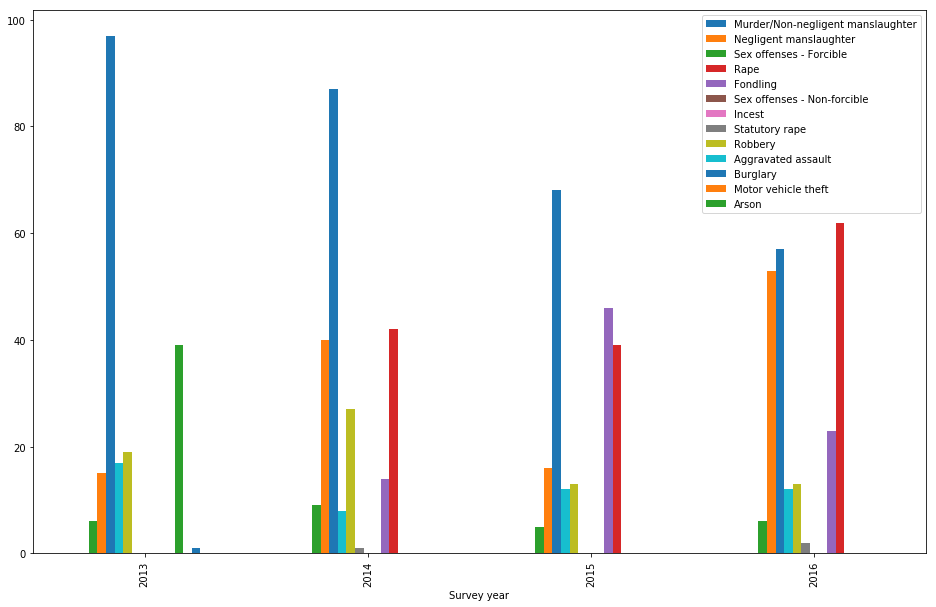

In [122]:
df.plot(x='Survey year', figsize = (16, 10), kind='bar').invert_xaxis()

# 3.1. Evaluate Algorithms


### 3.1.1 Predicting likelihood of a person to be labeled as a suspect based on race


<a href="https://ibb.co/bWRCsS"><img src="https://preview.ibb.co/f7UAe7/validation.png" alt="validation" border="0" /></a>